<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/FCI_Generative_Art_Magenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 





# **Criação de Imagens com modelo de IA Generativo**  

`Magenta` é um projeto de código aberto que emprega o aprendizado de máquina como ferramenta para processos criativo. Aqui você encontra o uso de um modelo generativo (uma rede deep learning) para gerar imagens estilizadas a partir de uma imagem de estilo. De modo simples, a ideia modelo generativo é a de aplicar a mesma  distribuição de probabilidade dos dados da imagem estilo à imagem original. 

<br>

<br>

---

# Entre com a imagem que deseja estilizar

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mackenzie_3740_041017.jpg to mackenzie_3740_041017.jpg
User uploaded file "mackenzie_3740_041017.jpg" with length 199513 bytes


# Imports

Check correct versions and for better experience make gpu available.

In [4]:
#@markdown `Common imports` 
import numpy as np
import os
import cv2
import matplotlib.pylab as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


TF Version:  2.8.2
TF Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Carrega a galeria de estilos

In [2]:
!wget http://meusite.mackenzie.br/rogerio/painters.zip
!unzip painters.zip
!ls /content


--2022-09-05 16:33:31--  http://meusite.mackenzie.br/rogerio/painters.zip
Resolving meusite.mackenzie.br (meusite.mackenzie.br)... 168.197.92.228
Connecting to meusite.mackenzie.br (meusite.mackenzie.br)|168.197.92.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3600439 (3.4M) [application/zip]
Saving to: ‘painters.zip’

painters.zip        100%[===================>]   3.43M   778KB/s    in 5.8s    

2022-09-05 16:33:37 (610 KB/s) - ‘painters.zip’ saved [3600439/3600439]

Archive:  painters.zip
   creating: painters/
 extracting: painters/Bosch.jpg      
  inflating: painters/Caravaggio.jpeg  
  inflating: painters/Frank_Frazetta.jpg  
  inflating: painters/Klimt.jpg      
  inflating: painters/Michelangelo.jpg  
  inflating: painters/Moebius.jfif   
  inflating: painters/Monet.jpg      
 extracting: painters/Munch.jpg      
  inflating: painters/Portinari.jpg  
  inflating: painters/Raphael1.jpg   
  inflating: painters/Raphael2.jpg   
  inflating: painter

In [5]:
#@markdown List painters
[x.split('.')[0] for x in list(np.sort( os.listdir('/content/painters/')))]

['Bosch',
 'Caravaggio',
 'Frank_Frazetta',
 'Klimt',
 'Michelangelo',
 'Moebius',
 'Monet',
 'Munch',
 'Portinari',
 'Raphael1',
 'Raphael2',
 'RogerDean',
 'Tarsila',
 'Van_gogh',
 'Vermeer']

# Create stylized images with `Magenta` Deep Learning  Network




In [6]:
#@markdown
from IPython.display import IFrame
IFrame("https://magenta.tensorflow.org/", 800,500)

In [7]:
#@markdown `generate_stylized(content_image,style_image)`
def generate_stylized(content_image,style_image):

  content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
  style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

  style_image = tf.image.resize(style_image, (256, 256))

  # Load image stylization model from TF hub
  hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

  outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
  stylized_image = outputs[0]

  stylized_image = np.array(stylized_image)

  # reshape the stylized image
  stylized_image = stylized_image.reshape(stylized_image.shape[1],stylized_image.shape[2],stylized_image.shape[3])

  return stylized_image

# Plot images

In [8]:
#@markdown `plot_images(content_image,style_image,stylized_image,artist_name,first=False)`
def plot_images(content_image,style_image,stylized_image,artist_name,first=False):


  if first:
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(content_image)
    ax.set_title("Original Image", fontsize=14, loc='left')
    ax.set_xlim([0,1000])
    ax.set_ylim([content_image.shape[0],0])
    ax.set_axis_off()

    plt.show()
    print() 
    print()

  fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))

  ax[0].imshow(style_image)
  ax[0].set_title(artist_name, fontsize=14, loc='left')
  ax[0].set_xlim([0,content_image.shape[1]])
  ax[0].set_ylim([content_image.shape[0],0])
  ax[0].set_axis_off()

  ax[1].imshow(stylized_image)
  ax[1].set_title('Image in ' + artist_name + ' Style', fontsize=14, loc='left')
  ax[1].set_xlim([0,content_image.shape[1]])
  ax[1].set_ylim([content_image.shape[0],0])
  ax[1].set_axis_off()

  plt.show()
  print() 


# Run and plot image for all Styles

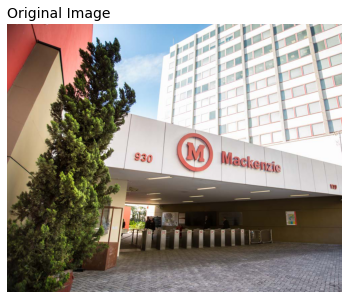

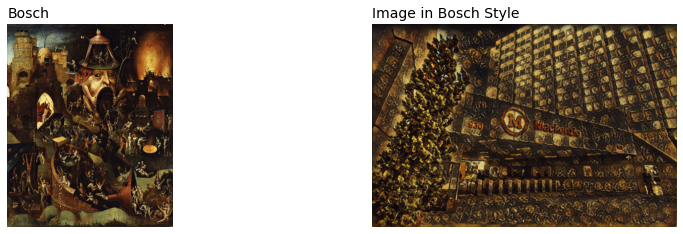

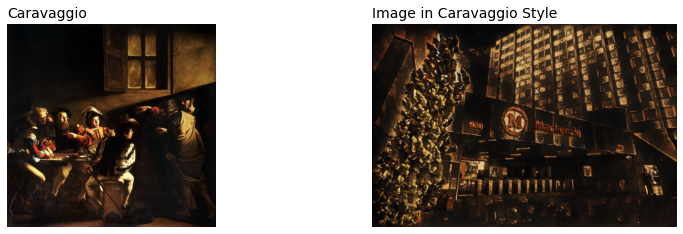

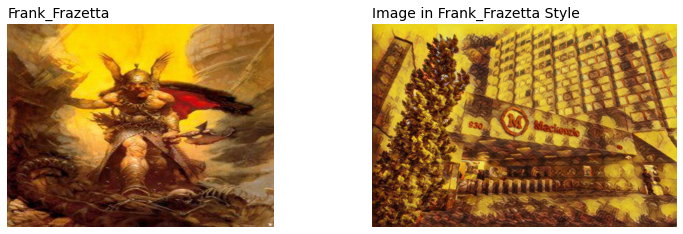

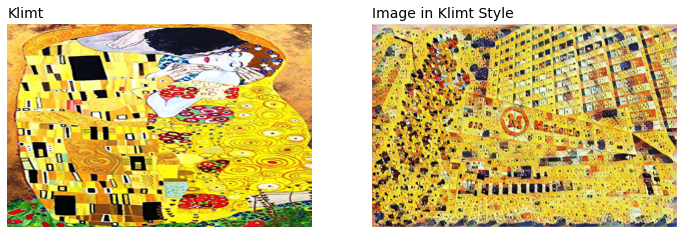

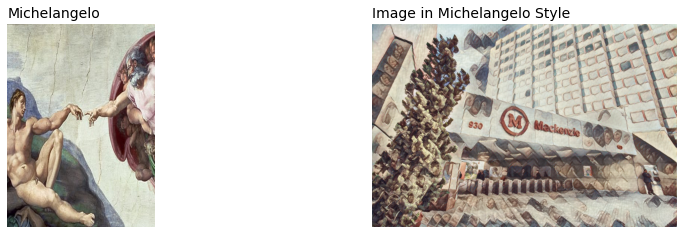

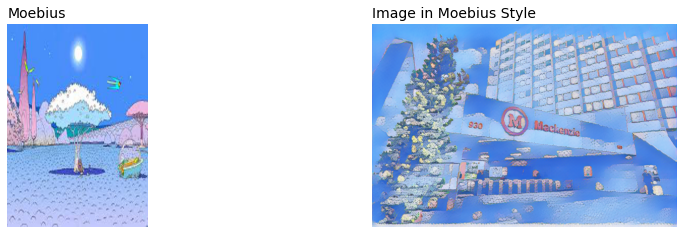

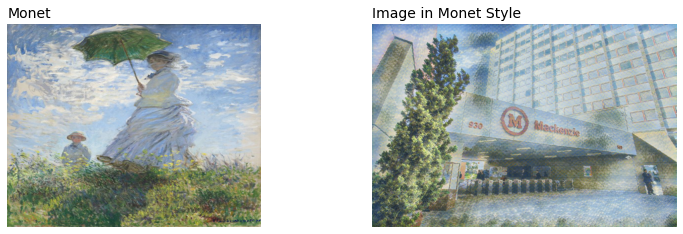

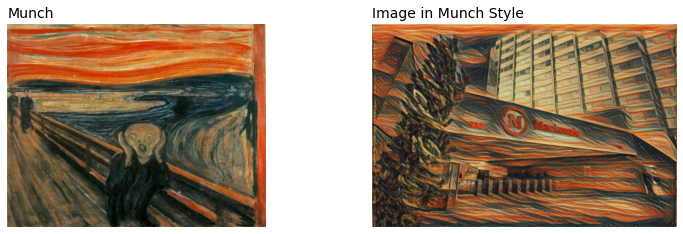

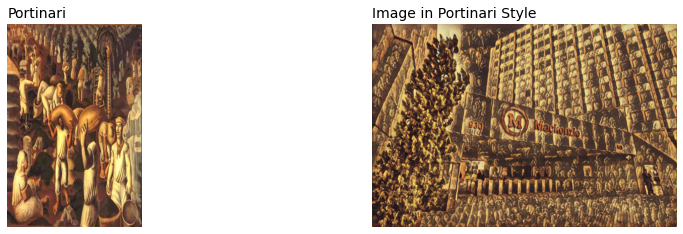

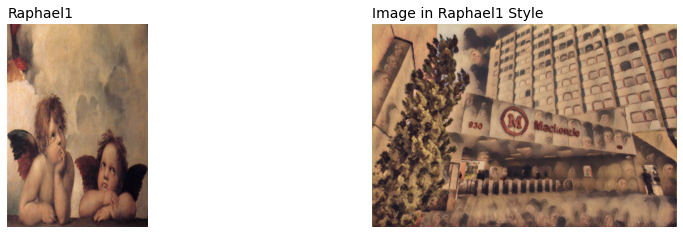

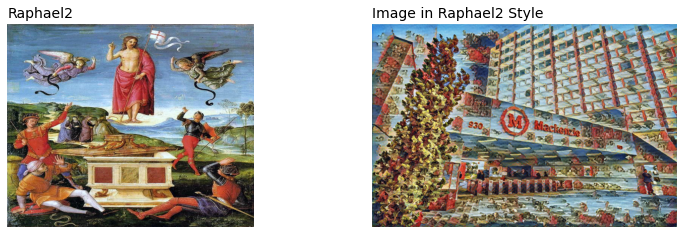

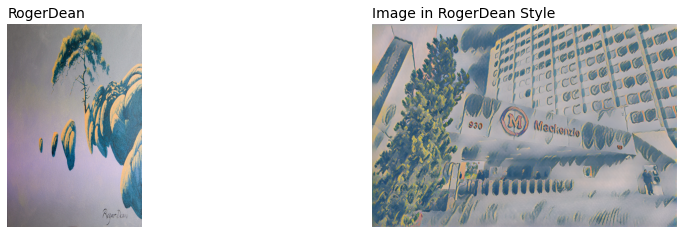

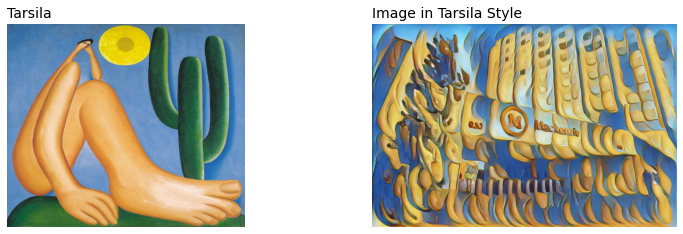

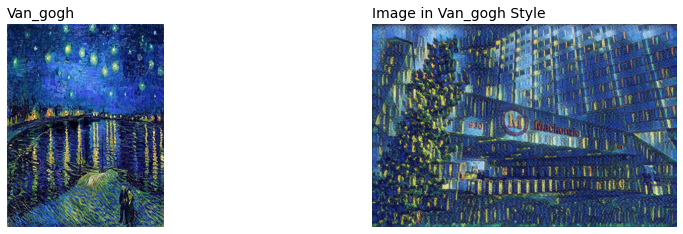

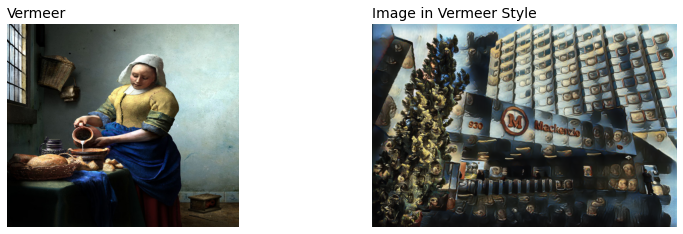

In [10]:
first = True
for p in list(np.sort( os.listdir('/content/painters/') )):

  content_image_path = "/content/" + fn
  style_image_path = "/content/painters/" + p

  content_image = plt.imread(content_image_path)
  style_image = plt.imread(style_image_path)

  # resize
  style_image = cv2.resize(style_image, dsize=(int( style_image.shape[0] * content_image.shape[0] / style_image.shape[1] ), content_image.shape[0]), interpolation=cv2.INTER_CUBIC)

  # stylized
  stylized_image = generate_stylized(content_image,style_image) 
  
  # plot
  plot_images(content_image,style_image,stylized_image,p.split('.')[0],first=first)
  first = False 
